In [1]:
# 타이타닉 데이터 불러오기
import seaborn as sns
# seaborn의 연습용 데이터는 DataFrame 구조
data = sns.load_dataset("titanic")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
# 젂처리 작업 수행
# 중복열 제거
prep_data = data.drop(columns=["alive", "who", "adult_male", "class", "embark_town"])
# 결측값이 맋은 열 제거
prep_data.drop("deck", axis=1, inplace=True)
prep_data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [65]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 4), columns=['C1','C2','C3','C4'])
df.loc[[0,1], 'C1'] = None
df.loc[2, 'C2'] = np.nan
df.loc[2, 'C3'] = np.nan
df

,C1,C2,C3,C4
0,NaN,-0.330870,2.430771,-0.252092
1,NaN,1.582481,-0.909232,-0.591637
2,0.187603,NaN,NaN,-0.204877
3,-0.358829,0.603472,-1.664789,-0.700179
4,1.151391,1.857331,-1.511180,0.644848


In [66]:
df_drop_row = df.dropna(axis=0) # axis 0이 default
df_drop_row

,C1,C2,C3,C4
3,-0.358829,0.603472,-1.664789,-0.700179
4,1.151391,1.857331,-1.511180,0.644848


In [67]:
df_drop_col = df.dropna(axis=1)
df_drop_col

,C4
0,-0.252092
1,-0.591637
2,-0.204877
3,-0.700179
4,0.644848


In [68]:
df_drop_row_thresh = df.dropna(thresh=3) # thresh 의 숫자
df_drop_row_thresh

,C1,C2,C3,C4
0,NaN,-0.330870,2.430771,-0.252092
1,NaN,1.582481,-0.909232,-0.591637
3,-0.358829,0.603472,-1.664789,-0.700179
4,1.151391,1.857331,-1.511180,0.644848


In [69]:
df_drop_row_thresh = df.dropna(axis=1, thresh=4) # thresh 의 숫자
df_drop_row_thresh

,C2,C3,C4
0,-0.330870,2.430771,-0.252092
1,1.582481,-0.909232,-0.591637
2,NaN,NaN,-0.204877
3,0.603472,-1.664789,-0.700179
4,1.857331,-1.511180,0.644848


In [70]:
# 결측값 제거후 인덱스 재정렬
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 45.3+ KB


In [71]:
from sklearn.preprocessing import LabelEncoder
# male은 0, femail은 1로 변홖
le = LabelEncoder()
prep_data["sex"] = le.fit_transform(prep_data["sex"])
prep_data.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,False
708,0,2,1,27.0,0,0,13.000,S,True
709,1,1,0,19.0,0,0,30.000,S,True
710,1,1,1,26.0,0,0,30.000,C,True
711,0,3,1,32.0,0,0,7.750,Q,True


In [72]:
# embarked 열은 문자열이므로 숫자 자료형으로 변환
from sklearn.preprocessing import OneHotEncoder

embarked_unique = prep_data.embarked.unique()
print(f"embarked열의 고유한 값:{embarked_unique}\n")


embarked열의 고유한 값:['S' 'C' 'Q']



In [73]:
# fancy indexing은 DataFrame을 반홖
embarked_df = prep_data[["embarked"]]
embarked_df

,embarked
0,S
1,C
2,S
3,S
4,S
...,...
707,Q
708,S
709,S
710,C


# get_dummies

In [12]:
#emparked_pd = pd.get_dummies(emparked_df) # df['cn'] cn 을 주면 그 컬럼만 반영되므로 ==


In [13]:
#egd1

In [14]:
# OneHotExcodersms DataFrame맊 입력 가능
ohe = OneHotEncoder()

ohe.fit(embarked_df)
embarked_ohe = ohe.transform(embarked_df)
print(embarked_ohe)

  (0, 2)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 0)	1.0
  :	:
  (687, 2)	1.0
  (688, 2)	1.0
  (689, 2)	1.0
  (690, 0)	1.0
  (691, 2)	1.0
  (692, 2)	1.0
  (693, 2)	1.0
  (694, 2)	1.0
  (695, 2)	1.0
  (696, 2)	1.0
  (697, 0)	1.0
  (698, 0)	1.0
  (699, 2)	1.0
  (700, 2)	1.0
  (701, 0)	1.0
  (702, 2)	1.0
  (703, 2)	1.0
  (704, 2)	1.0
  (705, 2)	1.0
  (706, 2)	1.0
  (707, 1)	1.0
  (708, 2)	1.0
  (709, 2)	1.0
  (710, 0)	1.0
  (711, 1)	1.0


In [74]:
# OneHotEncoding 결과를 numpy 배열로 변홖핚 후, 다시 DataFrame으로 변홖핚다.
import pandas as pd
embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique)
embarked_df.sample(5)


,S,C,Q
647,0.0,0.0,1.0
702,0.0,0.0,1.0
12,0.0,0.0,1.0
541,1.0,0.0,0.0
163,0.0,0.0,1.0


In [75]:
# 인코딩핚 DataFrame을 학습데이터 DataFrame에 합쳐주고 기존 embarked 열은 삭제핚다.
prep_data = pd.concat([prep_data, embarked_df], axis=1)
prep_data = prep_data.drop("embarked", axis=1)
prep_data


,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,True,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,True,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,True,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,True,1.0,0.0,0.0


In [76]:
le = LabelEncoder()
prep_data['alone'] = le.fit_transform(prep_data['alone'])
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,0,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,1,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,1,1.0,0.0,0.0


In [77]:
# 성능 검증을 위해서 트레인셋과 테스트셋으로 분리핚다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], prep_data.iloc[:, 0], random_state=42)


# sklearn.tree DecisionTreeClassifier Parameters
- criterion: gini, entropy.  default= gini
 - gini는 entropy보다 연산속도는 빠르나 한쪽으로 편향된결과를 낼 수 있다.
 - entropy는 gini에 비해 조금 더 균형 잡힌 model을 만들 수 있다.
- max_depth: Decision Tree의 최대 깊이 제한. default=None. 클수록 정확(과대적합), 작을수록 가지치기(과대적합 방지)
- min_samples_split: 노드에서 가지를 분리할 때 필요한 최소 sample개수에 대한 제한. default=2 클수록 가지치기(과적방지)작을수록(과적)
- min_samples_leaf: 한 노드에서 가지고 있어야 할 최소 sample개수에 대한 제한. default=1.클수록 가지칙(과적방지) 작을수록 정확하게(과적)
 - int일 경우, 주어진 값을 그대로 사용.
 - float일 경우, 0~1 사이의 값을 줄 수 있으며 cell(전체 데이터 수*min_samples_leaf)의 값 사용
- max_features: 최상의 분할을 찾기위한 feature수. default=None
 - int일 경우, 주어진 값 그대로 사용
 - float일 경우, int(max_features * 총 변수 개수) 사용
 - None일 경우, 총 변수 개수를 사용한다
- max_leaf_nodes: int or None, optional( default=None). 최대 몇개 잎 노드가 만들어 질때 까지 split(하위(앞)노드로 분리) 할 것이냐를 결정한다. 클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.
- min_impurity_decrease: 분할로 얻어질 분수도 감소량 지정
- min_impurity_split: 분할 대상이 되기 위해 필요한 최소한으이 불순도 지정
- min_weight_fraction_leaf: min_samples_leaf와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율
- splitter: 각 노드에서 분할을 선택하는데 사용되는 전략(default:best)
- class_weight: 클래스 가중치
- presort: 데이터 정렬 필요 여부

In [38]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

#하이퍼 파라미터, 가지치기
model = DecisionTreeClassifier(max_depth=2) # max_depth : 트리의 최대 깊이
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [85]:
# GSCV 후 수정된 params 로 재 train
#
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter="best")
model.fit(X_train, y_train)
#'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

In [86]:
# 모델 예측 및 평가
score = model.score(X_test, y_test)
print("정확도 :", score)


정확도 : 0.7247191011235955


In [87]:
import numpy as np
import matplotlib.pyplot as plt

print("피처 중요도:\n", model.feature_importances_)


피처 중요도:
 [0.21462224 0.50318716 0.10079548 0.05925989 0.0196798  0.10245543
 0.         0.         0.         0.        ]


(-1.0, 10.0)

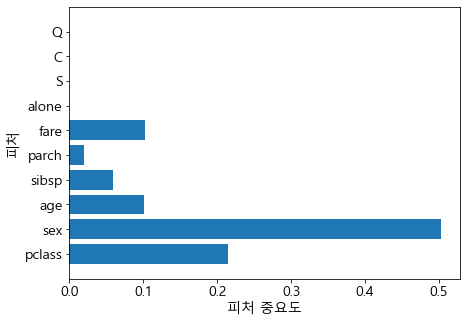

In [88]:
plt.rcParams["font.family"] = 'Malgun Gothic'
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)

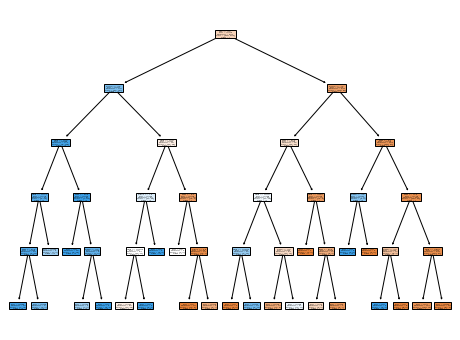

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6))
plot_tree(model.fit(X_train, y_train), feature_names=X_train.columns, class_names="label_val", filled=True)
plt.show()


# criterion, max_depth, spliter, min_sample_split, min_sample_leaf, max_leaf_node

In [83]:
from sklearn.model_selection import KFold, GridSearchCV

param = {"criterion":["gini", "entropy"],
         "max_depth":[2, 3, 4, 5, 6, None],
         "splitter":["best", "random"],
         "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
         "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9]
         "max_leaf_node":[2, 3, 4, 5, 6, 7, 8, 9]
        }

model = DecisionTreeClassifier()
# cv = KFold
gs = GridSearchCV(model,       # estimator
                  param_grid=param,
                  cv= 2,         
                  scoring=None, n_jobs=-1)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)



train_score : 0.8651685393258427 
test_score : 0.7528089887640449 
0.8052434456928839
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


In [79]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

# This is what it is

In [43]:
import pandas as pd
import numpy as np

# sklearn 모델의 동일핚 결과 출력을 위해 선언합니다.
np.random.seed(5)


In [44]:
# 서울의 대표적인 구(district) 위치 데이터

district_dict_list = [
 {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
 {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
 {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
 {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
 {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
 {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
 {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
 {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
 {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
 {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
 {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
 {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
 {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
 {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
 {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
 {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
 {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
 {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
 {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
 {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'} ]
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]


In [45]:
# 서울의 대표적인 동 위치 데이터
dong_dict_list = [
 {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
 {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
 {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
 {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
 {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
 {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
 {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
 {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
 {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
 {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
 {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
 {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
 {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
 {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
 {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
 {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
 {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
 {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
 {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
 {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'} ]
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]


In [46]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [49]:
# 경도와 위도의 평균과 편차 확인
train_df.describe()


,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


c:\ai_source\machinelearning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'district visualization in 2d plane')

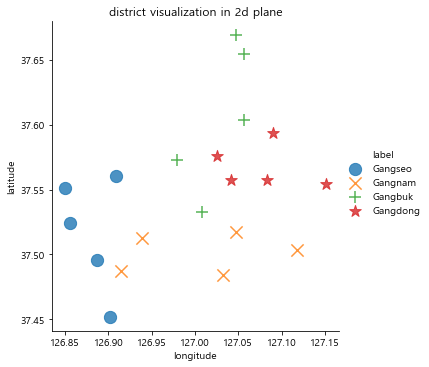

In [54]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

# 경도, 위도에 따른 데이터 시각화
sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False, # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*"], hue="label")
# title
plt.title('district visualization in 2d plane')


In [55]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace = True)


In [56]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]


In [57]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
import numpy as np

x = np.arange(1, 5, 1)
y = np.arange(1, 3, 1)
xx, yy = np.meshgrid(x, y)
xx
yy

In [58]:
def display_decision_surface(clf, X, y):
    # 챠트의 범위가 모듞 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
 
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) 

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)
    
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14
    # 챠트 그리기
    plt.show()
    

In [59]:
# pyplot은 숫자로 표현된 레이블을 시각화핛 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


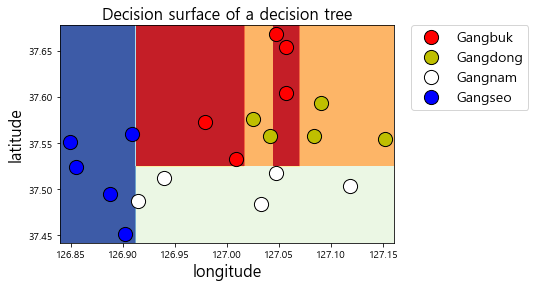

In [60]:
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


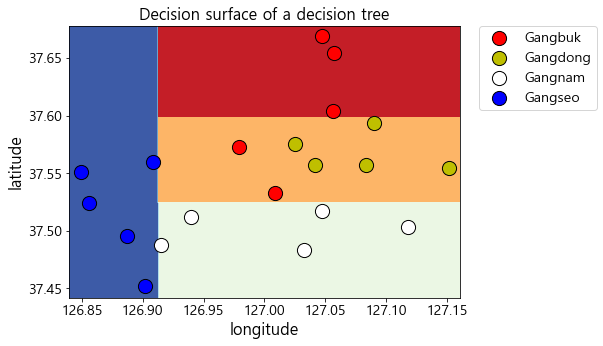

In [61]:
clf = tree.DecisionTreeClassifier(max_depth=3, 
                                  min_samples_split=3,
                                  min_samples_leaf=3, 
                                  random_state=5).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)

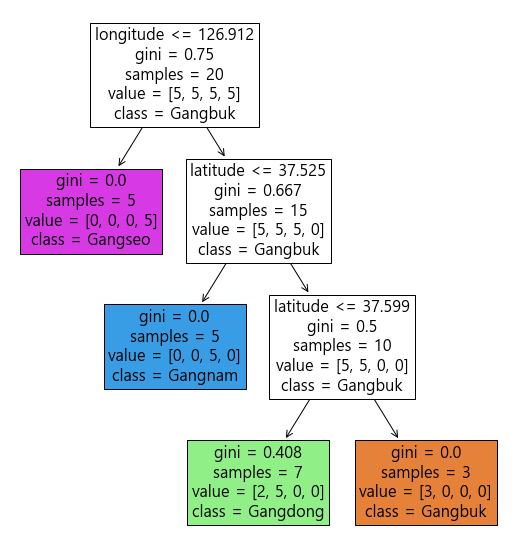

In [63]:
# 모델 그리기 : 의사결정나무를 시각화하는 기능을 자체적으로 지원핚다
from sklearn.tree import plot_tree

label_val = {0:'Gangbuk', 1:'Gangdong',2:'Gangnam',3:'Gangseo'}
plt.figure(figsize=(9,10))
plot_tree(clf.fit(X_train, y_encoded), feature_names=X_train.columns,
         class_names=label_val, filled=True)
plt.show()